# 0. Introduction

We are going to use the data that we have been provided to study and try to predict the evolution of Dengue disease in the cities of **San Jose**, *Puerto Rico*, and **Iquitos**, *Peru*. More information in this [link](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/).

To begin our study, this notebook will be part of our baseline, where various algorithms with simple optimization will be used, with the aim of beginning to know how we could create robust models.


# 1. Libraries

Before starting any analysis we must ensure that the basic and general use libraries *(numpy, pandas, etc.)* are correctly imported. 

In [1]:
# Preprocessing
from sklearn import preprocessing

# Loading the data
import pandas as pd
import io
from google.colab import files

# Graphics display
import seaborn as sns
import matplotlib.pyplot as plt

# Estimator and model selection
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB

# Others
import numpy as np    
from sklearn.metrics import mean_absolute_error 



# 2. Loading the data

The first step is to upload all the CSV files that have been provided to us and that thanks to them we will obtain the data with which we are going to work. To do this, we will use the tools that Google Colab offers us when uploading files.

## Preprocessing the data

We transform the data in order to allow us the posterior use of the algorithms to build prediction models, for example, missing values, from categories to numbers, etc.

In [2]:
# Make function to preprocess data
def preprocess_data(data_path, labels_path=None):
    # Load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path)
    # Fill missing values
    df.fillna(df.mean(), inplace=True)
    lb = preprocessing.LabelBinarizer()

    if labels_path:
        labels = pd.read_csv(labels_path)
        
        labels['city'] = lb.fit_transform(labels['city'])
    
    df['city'] =  lb.fit_transform(df['city'])

    selected_features = ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 'station_min_temp_c']
    df = df[selected_features]

    if labels_path:
        return df, labels
    return df

We execute the newly compiled method, which will allow us to load and preprocess our data.

In [3]:
df_features, df_labels  = preprocess_data('dengue_features_train.csv', labels_path="dengue_labels_train.csv")

Finally, we also load the file with which we will carry out the final prediction, once our model is trained.

In [4]:
df_test_final = preprocess_data("dengue_features_test.csv")

# 3. Detaching the dataset

To train the models that we make, it is necessary to separate our training dataset into two parts, one precisely to train the model, and another to check if our models are good.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels['total_cases'], test_size=0.2, random_state=1)

# 4. Execution of the algorithm

Naive Bayes classifiers are related to Bayes' theorem, and they assume that the presence or absence of one characteristic is totally independent of the presence or absence of the others.

In [6]:
def NaiveBayes(regressor, name, X_train, X_test):
    # Model construction
    regressor.fit(X_train, y_train)

    # Test
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    print ("Error Measure ",  mae, "\n")

    # Plot
    xx = np.arange(0,len(y_test),1)
    plt.scatter(xx, y_test, c='r', label='data')
    plt.plot(xx, y_pred, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title(name)
    plt.show()
    
    return regressor

We run the algorithm, with its different regressors

Error Measure  29.839041095890412 



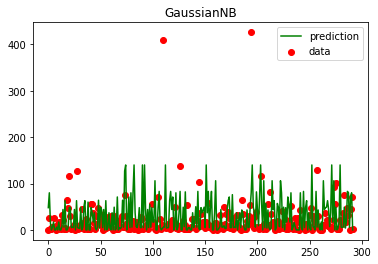

Error Measure  21.28767123287671 



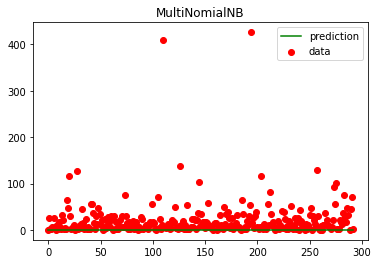

Error Measure  21.28767123287671 



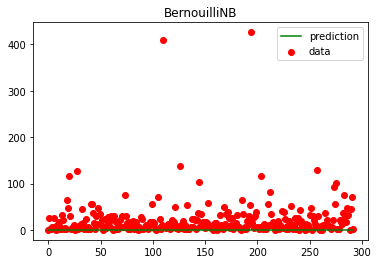

Error Measure  18.910958904109588 



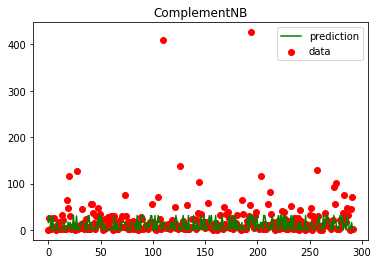

In [7]:
model1 = NaiveBayes(GaussianNB(),'GaussianNB',X_train,X_test)
model2 = NaiveBayes(MultinomialNB(),'MultiNomialNB',X_train,X_test)
model3 = NaiveBayes(BernoulliNB(),'BernouilliNB',X_train,X_test)
model4 = NaiveBayes(ComplementNB(),'ComplementNB',X_train,X_test)

## Submission result

Now, we are going to test our model with the data provided to us in the dengue_features_test.csv file to predict dengue cases for the weeks proposed in said file.

In [8]:
final_model_prediction_1 = model1.predict(df_test_final)
final_model_prediction_2 = model2.predict(df_test_final)
final_model_prediction_3 = model3.predict(df_test_final)
final_model_prediction_4 = model4.predict(df_test_final)

final_models = [final_model_prediction_1,final_model_prediction_2,final_model_prediction_3,final_model_prediction_4]

def roundResult(final_model_prediction):
  # Round the result and cast to int
  y = np.rint(final_model_prediction)
  y = y.astype(int)
  res = np.hstack(y)
  print(res)

for model in final_models:
  roundResult(model)  


[  0   6   5  80   6   5 140  80  49  71  49  60 106  60  49  82  80  80
  82  83  80  43  83  80  48  63  49 106  49  63   6  17  17   0  37   6
  37   6   6   6  17  17  37  37   7   7  37  37  37   7   6   0   0   7
   6   6  49 140  49  80  80  60  49  83  80  64  76  83  83  82 106  83
  76  49  82  82  82  80  76  60 140  49  43   5  84   6   6   6   0   3
   3   3  37   0   0   0 140   0   0   5   5   0   0   6  43  71  84  80
  49 112  82  82  43  44  80 112  83   4  82  82  82  82  80  82  80  82
  80  82  80  80  49 140  43   6   7   7  50   6  17  17  37  17   3  17
  17   7   6  17  37  37  50  37   3   0   7   7   6   6  17   0   5  49
   5   4   4  83  49  55  43  82  49   4  83  80  44  80  82  48  49  49
  51  51  84  43  48  43  63   6   6   6  17  17   6  17  17  37  37  17
   7  37   7   7  17   7  17   6   6   6   0  49   6  49  49  49 106  60
  60  60  60  43  83  82  83  80  83  82  49  60  60  60  82  80  71  83
  80  80  71  80 106  49   5   0   0   0   6   7  1

As you can see, with the MultinomialNB and BernouilliNB classifiers, basically nothing is predicted, even so, we will test them in the Driven Data competition, although the results will be very bad.

Finally, we are going to download a CSV file that contains our prediction, to load it into DrivenData and return the score of our model.

In [9]:
def buildOutput(submission,final_model_prediction,c):
  submission.total_cases = final_model_prediction.astype(np.int64)
  submission.to_csv("result" + str(c) +".csv")

c = 0
for model in final_models:
  submission = pd.read_csv("submission_format.csv", index_col=[0, 1, 2])
  buildOutput(submission, model,c)
  c = c + 1


**And the result is:**

GaussianNB: *34.4519
Woo! I scored 34.4519 on 'DengAI: Predicting Disease Spread'!*

MultinomialNB: *37.5889
Woo! I scored 37.5889 on 'DengAI: Predicting Disease Spread'!*

BernouilliNB: *37.5889
Woo! I scored 37.5889 on 'DengAI: Predicting Disease Spread'!*

ComplementNB: *31.0673
Woo! I scored 31.0673 on 'DengAI: Predicting Disease Spread'!*


Unlike the rest of the algorithms that we have tested with simple optimization, the results are not very encouraging, and therefore, we think that even if we optimize the models, we will surely find better models with other algorithms.